In [ ]:
#Arbitrary Value Imputation

It consists of replacing NaN by an arbitrary value
Arbitrary value: this should be more frequently present

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
def imput_nan(df, var):
    df[var+'_hundred'] = df[var].fillna(100)
    df[var+'_zero'] = df[var].fillna(0)

In [ ]:
Disadvantage:
    Hard to decide which value is use

### How to handle Categorical Missing values:
1. Frequent Category imputation

In [28]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/loan.csv',usecols=['BsmtQual','FireplaceQu', 'GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.isnull().sum()
# df.isnull.mean()   # to find % of missing value

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [10]:
df.shape

(1460, 4)

In [29]:
df.BsmtQual.mode()[0]

'TA'

In [12]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [30]:
def impute_nan(df,var):
    most_frequent_val = df[var].mode()[0]
    df[var].fillna(most_frequent_val,inplace=True)

In [31]:
for feature in ['BsmtQual','FireplaceQu']:
    impute_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [32]:
df.isnull().mean()

BsmtQual       0.000000
FireplaceQu    0.000000
GarageType     0.055479
SalePrice      0.000000
dtype: float64

<AxesSubplot:xlabel='BsmtQual'>

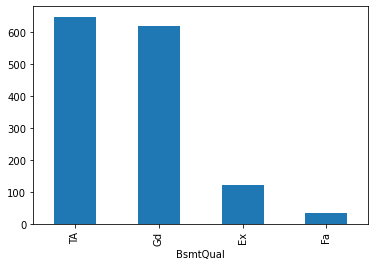

In [16]:
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending=False).plot.bar()

> Advantages:
Easy to implement
Faster way to implement

> Disadvantages:
Since we are using the more frequent labels, it may yse them in over represented way, is there is many NaNs.
It distorts the relation of the most frequent label

### Adding a variable to capture NaN

In [43]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/loan.csv',usecols=['BsmtQual','FireplaceQu', 'GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [35]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [45]:
frequent = df['FireplaceQu'].mode()[0]
frequent

'Gd'

In [46]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)

In [47]:
df['FireplaceQu'].fillna(frequent, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [42]:
#Advantages

#Disadvantages:
Creating many features

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose you have more frequent categories. We just replace NaN with a new category
> This is most common in usages

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/loan.csv',usecols=['BsmtQual','FireplaceQu', 'GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
def imput_nan(df,var):
    df[var] = np.where(df[var].isnull(),'Missing', df[var])

In [51]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    imput_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


#### Handle Categorical features

In [52]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv', usecols=['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
pd.get_dummies(df['Sex'], drop_first=True)[:5]

,male
0,1
1,0
2,0
3,0
4,1


In [57]:
df = pd.read_csv('datasets/titanic.csv', usecols=['Embarked'])
df.dropna(inplace=True)

In [59]:
pd.get_dummies(df['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [61]:
df = pd.read_csv('datasets/mercedes.csv', usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [63]:
# find number of labels in each column
for col in df.columns:
    print(len(df[col].unique()))

47
27
44
7
4
29
12


In [66]:
list_10 = list(df['X1'].value_counts().head(10).index)
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [67]:
for label in list_10:
    df[label] = np.where(df['X1']==label,1,0)

In [69]:
list_10.append('X1')
df[list_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
